In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway

# Data Analysis

### Correlation

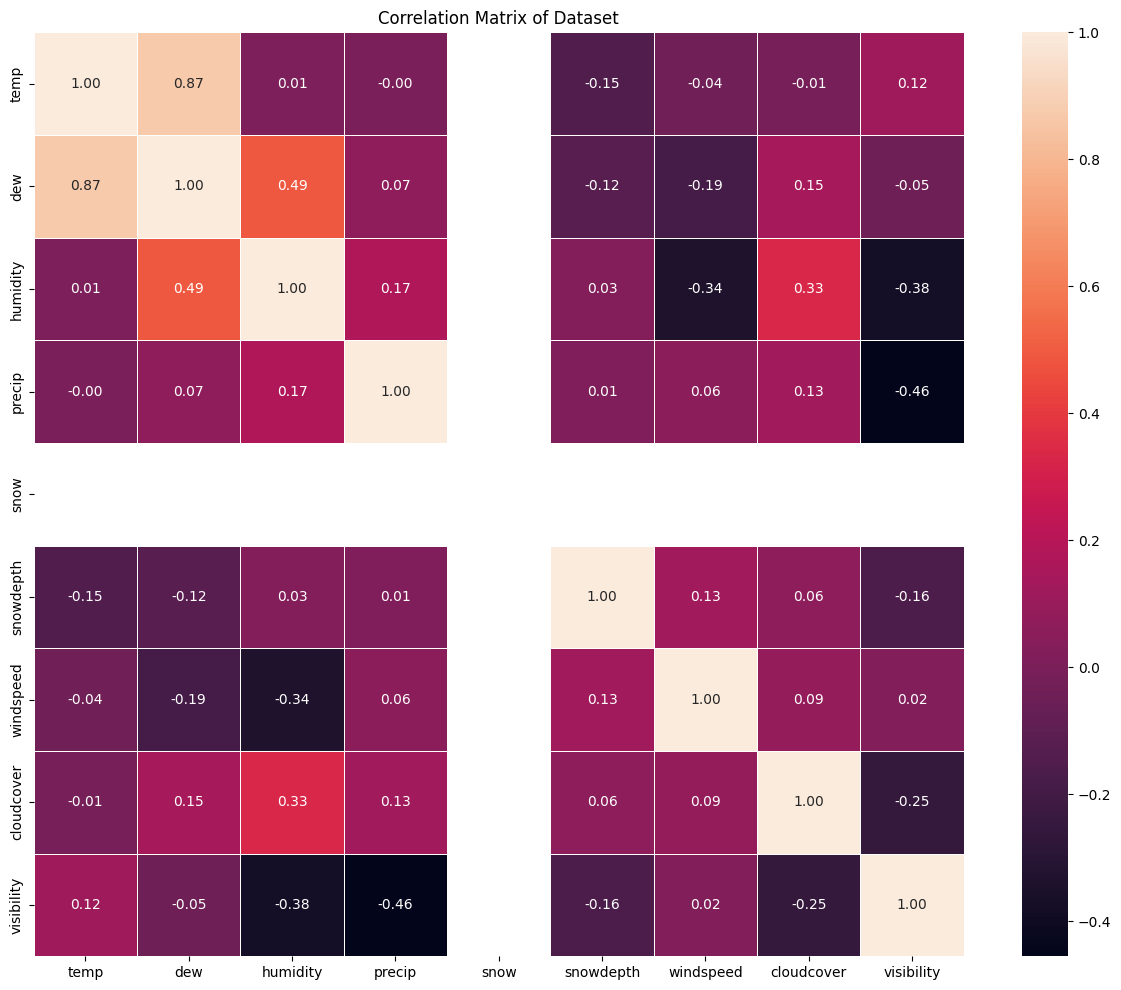

In [6]:
## Import training data
dataSet = pd.read_csv('training_data.csv')

## Mapping Increase_Stock to have binary values
dataSet['increase_stock'] = dataSet['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})

snowy = []
for i in dataSet['snowdepth']:
    if i > 0:
        snowy.append(1)
    else:
        snowy.append(0)
dataSet["snowy"] = snowy

column_to_move = dataSet.pop('increase_stock')
dataSet['increase_stock'] = column_to_move

dataSet = dataSet.drop(columns=['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snowy', 'increase_stock'])

## Correlation Matrix
corr = dataSet.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Dataset')
plt.show()

Outliers: 5
Outliers: 27


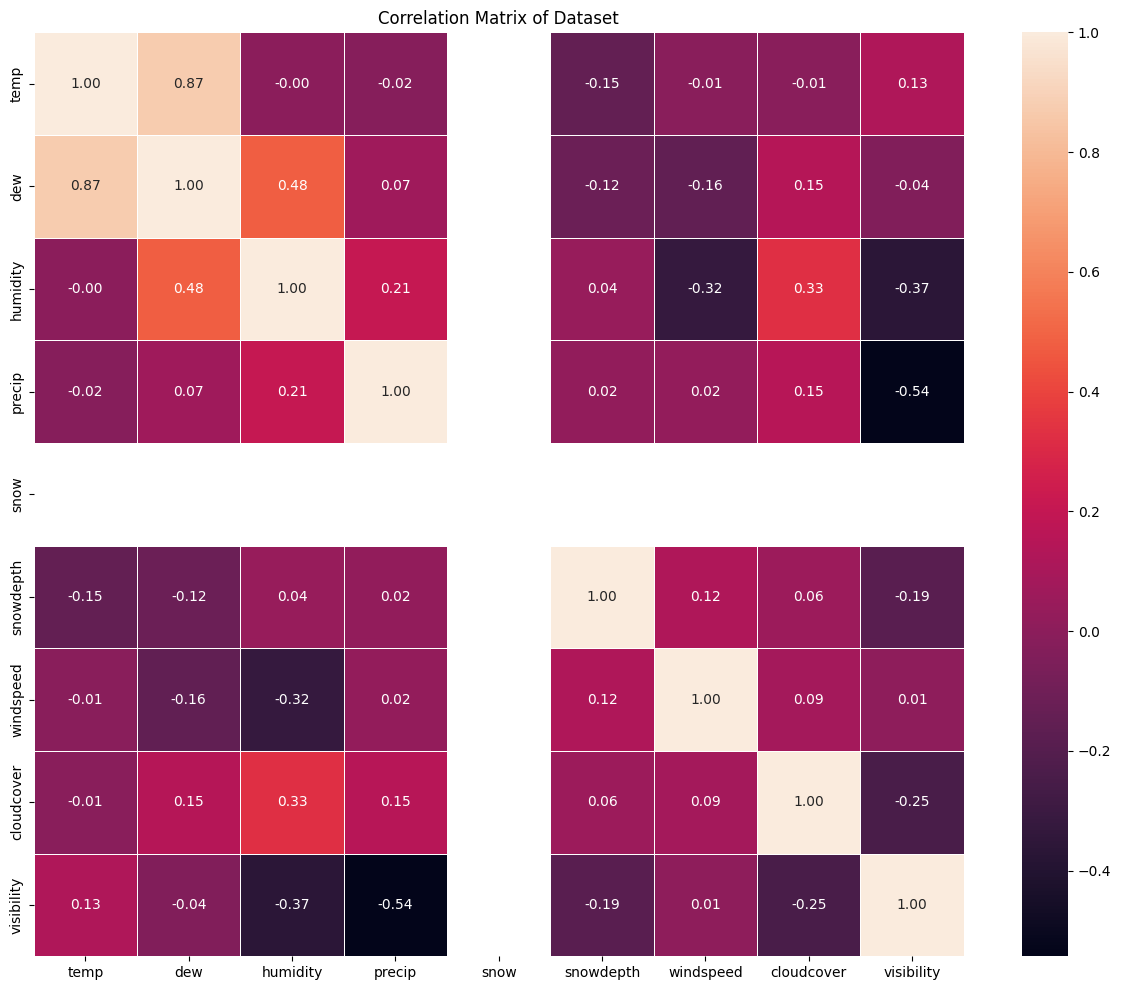

In [19]:
## Import training data
dataSet = pd.read_csv('training_data.csv')

## Mapping Increase_Stock to have binary values
dataSet['increase_stock'] = dataSet['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})

snowy = []
for i in dataSet['snowdepth']:
    if i > 0:
        snowy.append(1)
    else:
        snowy.append(0)
dataSet["snowy"] = snowy

column_to_move = dataSet.pop('increase_stock')
dataSet['increase_stock'] = column_to_move

dataSet = dataSet.drop(columns=['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snowy', 'increase_stock'])

## Outliers, visibility
indexOutliers = dataSet[(dataSet['visibility'] <= 2)].index
print('Outliers:', len(dataSet[(dataSet['visibility'] <= 2)]))
dataSet = dataSet.drop(index=indexOutliers)

## Outliers, windspeed
indexOutliers = dataSet[(dataSet['windspeed'] >= 33)].index
print('Outliers:', len(dataSet[(dataSet['windspeed'] >= 33)]))
dataSet = dataSet.drop(labels=indexOutliers)

## Correlation Matrix
corr = dataSet.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Dataset')
plt.show()

#### Anova and chi2

In [20]:
## Import training data
dataSet = pd.read_csv('training_data.csv')

## Mapping Increase_Stock to have binary values
dataSet['increase_stock'] = dataSet['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})


## Adding new features
snowy = []
for i in dataSet['snowdepth']:
    if i > 0:
        snowy.append(1)
    else:
        snowy.append(0)
dataSet["snowy"] = snowy

column_to_move = dataSet.pop('increase_stock')
dataSet['increase_stock'] = column_to_move



features = ['hour_of_day', 'day_of_week', 'month', 'snowy', 'holiday', 'weekday', 'increase_stock']
print('chi2:')
for feat in features:
    # Cross tabulation
    CrosstabResult=pd.crosstab(index=dataSet[feat], columns=dataSet['increase_stock'])
    
    # Performing Chi-sq test
    ChiSqResult = chi2_contingency(CrosstabResult)
    
    # P-Value is the Probability of H0 being True
    # If P-Value>0.05 then only we Accept the assumption(H0)
    
    print(feat, ChiSqResult[1])


features = ['hour_of_day', 'temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']
print('\navonva:')
for feat in features:
    # f_oneway() function takes the group data as input and
    # returns F-statistic and P-value
    
    CategoryGroupLists=dataSet.groupby('increase_stock')[feat].apply(list)
    
    # Performing the ANOVA test
    # Assumption(H0) is that there is NO correlated
    # We accept the Assumption(H0) only when P-Value > 0.05
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(feat, AnovaResults[1])

chi2:
hour_of_day 1.8378388976261914e-89
day_of_week 0.0001498952699486729
month 1.7536338201817043e-14
snowy 0.0005390430441968344
holiday 0.9883957129725334
weekday 4.515202807870371e-06
increase_stock 0.0

avonva:
hour_of_day 1.7074736232480883e-22
temp 8.782314479721536e-44
dew 1.0042933747684312e-07
humidity 1.1233541648970302e-36
precip 0.017673706832891125
snowdepth 0.057349022065787826
windspeed 0.00011989614680610604
cloudcover 0.06862557007901302
visibility 5.393194032273692e-06


In [21]:
## Import training data
dataSet = pd.read_csv('training_data.csv')

## Mapping Increase_Stock to have binary values
dataSet['increase_stock'] = dataSet['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})


## Adding new features
snowy = []
for i in dataSet['snowdepth']:
    if i > 0:
        snowy.append(1)
    else:
        snowy.append(0)
dataSet["snowy"] = snowy

column_to_move = dataSet.pop('increase_stock')
dataSet['increase_stock'] = column_to_move

## Outliers, visibility
indexOutliers = dataSet[(dataSet['visibility'] <= 2)].index
print('Outliers:', len(dataSet[(dataSet['visibility'] <= 2)]))
dataSet = dataSet.drop(index=indexOutliers)

## Outliers, windspeed
indexOutliers = dataSet[(dataSet['windspeed'] >= 33)].index
print('Outliers:', len(dataSet[(dataSet['windspeed'] >= 33)]))
dataSet = dataSet.drop(labels=indexOutliers)

features = ['hour_of_day', 'day_of_week', 'month', 'snowy', 'holiday', 'weekday', 'increase_stock']
print('chi2:')
for feat in features:
    CrosstabResult=pd.crosstab(index=dataSet[feat], columns=dataSet['increase_stock'])
    
    # Performing Chi-sq test
    ChiSqResult = chi2_contingency(CrosstabResult)
    
    # P-Value is the Probability of H0 being True
    # If P-Value>0.05 then only we Accept the assumption(H0)
    
    print(feat, ChiSqResult[1])


features = ['hour_of_day', 'temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']
print('\navonva:')
for feat in features:
    # f_oneway() function takes the group data as input and
    # returns F-statistic and P-value
    
    CategoryGroupLists=dataSet.groupby('increase_stock')[feat].apply(list)
    
    # Performing the ANOVA test
    # We accept the Assumption(H0) only when P-Value > 0.05
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(feat, AnovaResults[1])

Outliers: 5
Outliers: 27
chi2:
hour_of_day 1.558128613220609e-90
day_of_week 0.00017136049347050015
month 1.5573412124333331e-13
snowy 0.0006560358476913669
holiday 1.0
weekday 6.153024994292762e-06
increase_stock 0.0

avonva:
hour_of_day 3.392393953299765e-23
temp 1.6843064679302228e-42
dew 2.6146808290925694e-07
humidity 7.449276683399197e-38
precip 0.004187047588480819
snowdepth 0.06635718463385572
windspeed 6.302908803349797e-06
cloudcover 0.10286419046355852
visibility 7.99024951441791e-07


### Feature importance - Random Forrest

##### Getting data for this analysis

In [22]:
## Import training data
dataSet = pd.read_csv('training_data.csv')

## Mapping Increase_Stock to have binary values
dataSet['increase_stock'] = dataSet['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})

snowy = []
for i in dataSet['snowdepth']:
    if i > 0:
        snowy.append(1)
    else:
        snowy.append(0)
dataSet["snowy"] = snowy

rainy = []
for i in dataSet['precip']:
    if i > 0:
        rainy.append(1)
    else:
        rainy.append(0)
dataSet["rainy"] = rainy

column_to_move = dataSet.pop('increase_stock')
dataSet['increase_stock'] = column_to_move

## Outliers, visibility
indexOutliers = dataSet[(dataSet['visibility'] <= 2)].index
print('Outliers:', len(dataSet[(dataSet['visibility'] <= 2)]))
dataSet = dataSet.drop(index=indexOutliers)

## Outliers, windspeed
indexOutliers = dataSet[(dataSet['windspeed'] >= 33)].index
print('Outliers:', len(dataSet[(dataSet['windspeed'] >= 33)]))
dataSet = dataSet.drop(labels=indexOutliers)

np.random.seed(1)

ratio = 0.75    # percentage of the dataset to be used as training data, the remaining will be for testing
print(ratio*100, "% of test data =", int(len(dataSet)*ratio))
trainIndex = np.random.choice(dataSet.shape[0], size=int(len(dataSet)*.75), replace=False) # randomly selects a number of indices 
trainIndexBool = dataSet.index.isin(trainIndex) # creates an array with true/false based on whether the index is in the dataset
train = dataSet.iloc[trainIndex]                # selects training data from the positions in trainIndex that are True
test = dataSet.iloc[~trainIndexBool]            # the remaining data becomes test data

xTrain = train.copy().drop(columns=['increase_stock'])
yTrain = train['increase_stock']
xTest = test.copy().drop(columns=['increase_stock'])
yTest = test['increase_stock']

Outliers: 5
Outliers: 27
75.0 % of testdata = 1176


#### RandomForestClassifier most important features

In [ ]:
modelForrest = RandomForestClassifier(n_estimators=10000,
                                      max_features=0.7,
                                      random_state=0)
modelForrest.fit(xTrain, yTrain)

importance = modelForrest.feature_importances_

df = pd.DataFrame({'Features': pd.DataFrame(xTrain).columns, 'importances': importance})

df = df.sort_values('importances')

df

In [95]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector



efs = ExhaustiveFeatureSelector(RandomForestClassifier(n_estimators=1000,max_features=0.7, random_state=0), 
                                min_features=8, 
                                max_features=17, 
                                scoring='f1_macro', 
                                cv=5, 
                                n_jobs=-1,
                                fixed_features=(0, 1, 2, 4, 6, 8, 12, 14))
efs.fit(X=xTrain, y=yTrain)

selectedFeatures = xTrain.columns[list(efs.best_idx_)]
print(selectedFeatures)
print(efs.best_score_)

Features: 1023/1023

Index(['hour_of_day', 'day_of_week', 'month', 'weekday', 'summertime', 'temp',
       'humidity', 'snowdepth', 'cloudcover', 'visibility', 'beaufort_number',
       'night', 'rainy'],
      dtype='object')
0.8208244392535574


### Plots

#### Can any trend be seen comparing different hours, weeks, and months?

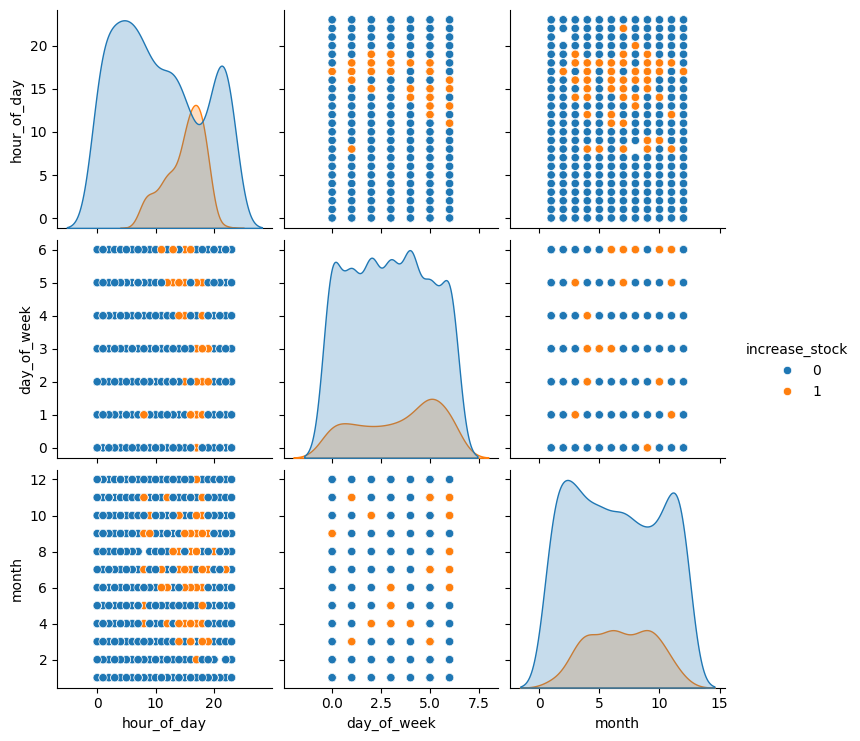

In [ ]:
data = {
    'hour_of_day': dataSet['hour_of_day'],
    'day_of_week': dataSet['day_of_week'],
    'month': dataSet['month'],
    'increase_stock': dataSet['increase_stock']
}
df = pd.DataFrame(data)

sns.pairplot(df, hue='increase_stock', corner=False)
plt.show()

#### Is there any difference between weekdays and holidays?

In [126]:
data = {
    'holiday': dataSet['holiday'],
    'weekday': dataSet['weekday'],
    'summertime': dataSet['summertime'],
    'increase_stock': dataSet['increase_stock']
}

df = pd.DataFrame(data)


isHoliday = df[df['holiday'] == 1]
print('Holiday High Bike Demand: ', isHoliday['increase_stock'].sum()/len(isHoliday)*100, 'samples: ', len(isHoliday))

isHoliday = df[df['holiday'] == 0]
print('Non-Holiday High Bike Demand: ', isHoliday['increase_stock'].sum()/len(isHoliday)*100, 'samples: ', len(isHoliday))

isWeekday = df[df['weekday'] == 1]
print('Weekday High Bike Demand: ', isWeekday['increase_stock'].sum()/len(isWeekday)*100, 'samples: ', len(isWeekday))

isWeekday = df[df['weekday'] == 0]
print('Non-Weekday High Bike Demand: ', isWeekday['increase_stock'].sum()/len(isWeekday)*100, 'samples: ', len(isWeekday))

isSummer = df[df['summertime'] == 1]
print('Summertime High Bike Demand: ', isSummer['increase_stock'].sum()/len(isSummer)*100, 'samples: ', len(isSummer))

isSummer = df[df['summertime'] == 0]
print('Non-Summertime High Bike Demand: ', isSummer['increase_stock'].sum()/len(isSummer)*100, 'samples: ', len(isSummer))

Holiday High Bike Demand:  16.9811320754717 samples:  53
Non-Holiday High Bike Demand:  18.034906270200388 samples:  1547
Weekday High Bike Demand:  15.140845070422534 samples:  1136
Non-Weekday High Bike Demand:  25.0 samples:  464
Summertime High Bike Demand:  24.174757281553397 samples:  1030
Non-Summertime High Bike Demand:  6.842105263157896 samples:  570


#### Is there any trend depending on the weather? Rainy days, snowy days, etc.

In [23]:
isRainy = dataSet[dataSet['rainy'] == 1]
print('Rainy Day High Bike Demand: ', isRainy['increase_stock'].sum()/len(isRainy)*100, 'samples: ', len(isRainy))

isRainy = dataSet[dataSet['rainy'] == 0]
print('Non-Rainy Day High Bike Demand: ', isRainy['increase_stock'].sum()/len(isRainy)*100, 'samples: ', len(isRainy))

isSnowy = dataSet[dataSet['snowy'] == 1]
print('Snowy Day High Bike Demand: ', isSnowy['increase_stock'].sum()/len(isSnowy)*100, 'samples: ', len(isSnowy))

isSnowy = dataSet[dataSet['snowy'] == 0]
print('Non-Snowy Day High Bike Demand: ', isSnowy['increase_stock'].sum()/len(isSnowy)*100, 'samples: ', len(isSnowy))

data = {
    'temp': dataSet['temp'],
    'dew': dataSet['dew'],
    'humidity': dataSet['humidity'],
    'windspeed': dataSet['windspeed'],
    'cloudcover': dataSet['cloudcover'],
    'visibility': dataSet['visibility'],
    'increase_stock': dataSet['increase_stock']
}
df = pd.DataFrame(data)


Rainy Day High Bike Demand:  5.298013245033113 samples:  151
Non-Rainy Day High Bike Demand:  19.477769936485533 samples:  1417
Snowy Day High Bike Demand:  0.0 samples:  56
Non-Snowy Day High Bike Demand:  18.78306878306878 samples:  1512


##### Snow

In [24]:
data = {
    'snowdepth': dataSet['snowdepth'],
    'increase_stock': dataSet['increase_stock']
}

df = pd.DataFrame(data)


snowy = df[df['increase_stock'] == 1]
print(max(snowy['snowdepth']))

snowyDays = len(df[df['increase_stock'] > 0])
print(snowyDays)

# Regarding snow: Snow is always zero, so we can ignore it. Snow depth only has high bike demand if snow depth == 0.
# Should we change snow depth to a boolean or binary value?

0.0
284


### Disribution of all features

In [25]:
## Import training data
dataSet = pd.read_csv('training_data.csv')

## Mapping Increase_Stock to have binary values
dataSet['increase_stock'] = dataSet['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})

snowy = []
for i in dataSet['snowdepth']:
    if i > 0:
        snowy.append(1)
    else:
        snowy.append(0)
dataSet["snowy"] = snowy

rainy = []
for i in dataSet['precip']:
    if i > 0:
        rainy.append(1)
    else:
        rainy.append(0)
dataSet["rainy"] = rainy

column_to_move = dataSet.pop('increase_stock')
dataSet['increase_stock'] = column_to_move

## Outliers, visibility
indexOutliers = dataSet[(dataSet['visibility'] <= 2)].index
print('Outliers:', len(dataSet[(dataSet['visibility'] <= 2)]))
dataSet = dataSet.drop(index=indexOutliers)

## Outliers, windspeed
indexOutliers = dataSet[(dataSet['windspeed'] >= 33)].index
print('Outliers:', len(dataSet[(dataSet['windspeed'] >= 33)]))
dataSet = dataSet.drop(labels=indexOutliers)

np.random.seed(1)

ratio = 0.75    # percentage of the dataset to be used as training data, the remaining will be for testing
print(ratio*100, "% of test data =", int(len(dataSet)*ratio))
trainIndex = np.random.choice(dataSet.shape[0], size=int(len(dataSet)*.75), replace=False) # randomly selects a number of indices 
trainIndexBool = dataSet.index.isin(trainIndex) # creates an array with true/false based on whether the index is in the dataset
train = dataSet.iloc[trainIndex]                # selects training data from the positions in trainIndex where the value is True
test = dataSet.iloc[~trainIndexBool]            # the remaining data becomes test data

xTrain = train.copy().drop(columns=['increase_stock'])
yTrain = train['increase_stock']
xTest = test.copy().drop(columns=['increase_stock'])
yTest = test['increase_stock']

Outliers: 5
Outliers: 27
75.0 % of testdata = 1176


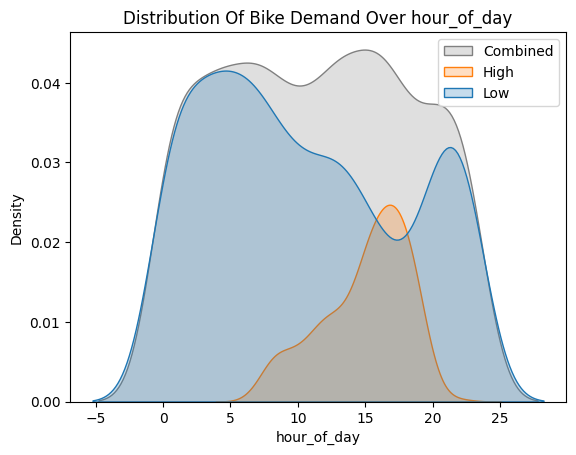

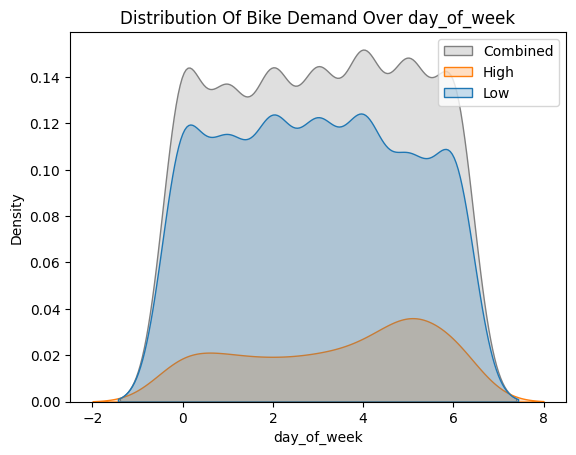

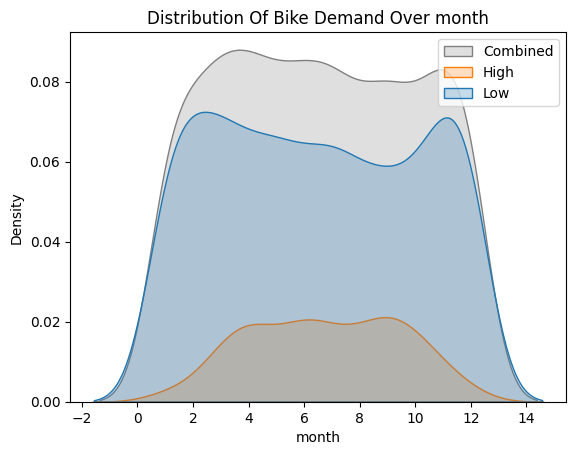

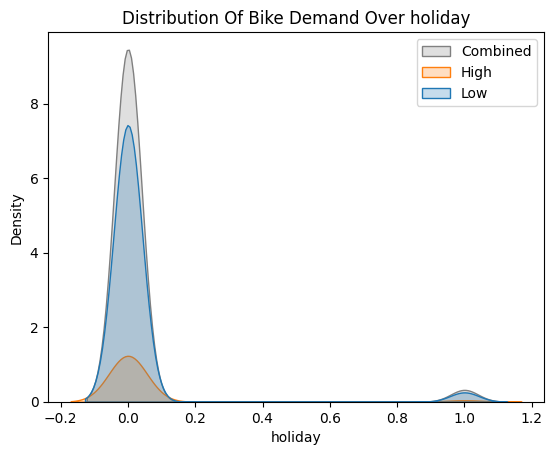

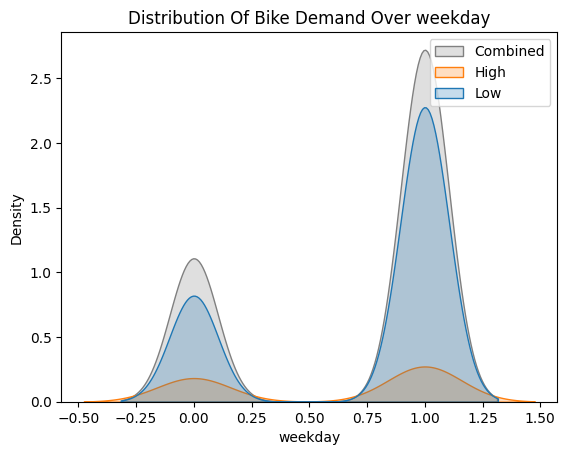

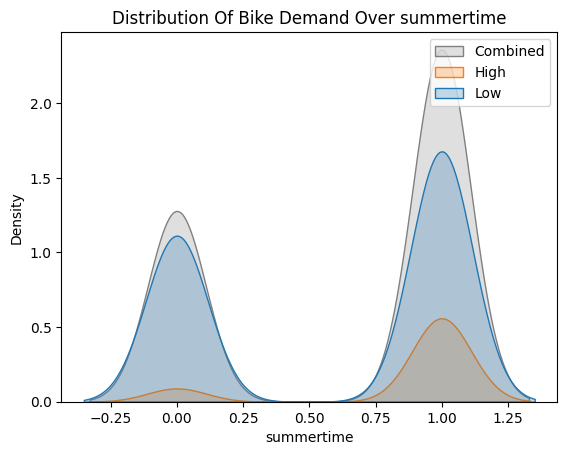

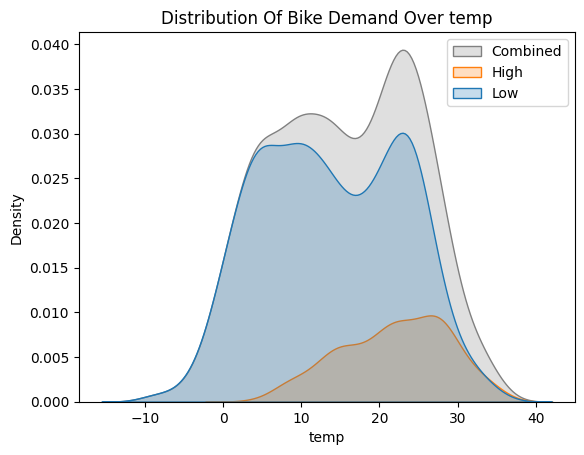

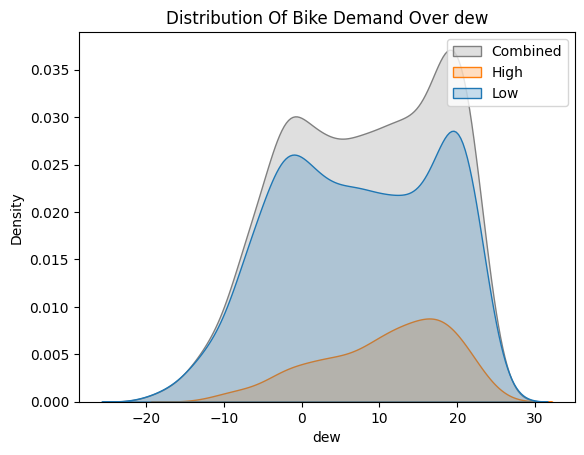

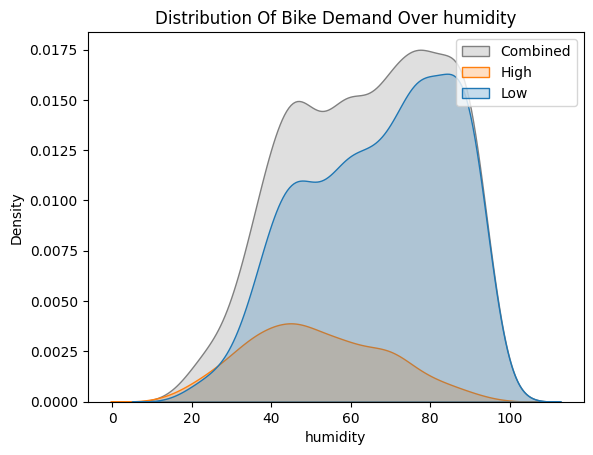

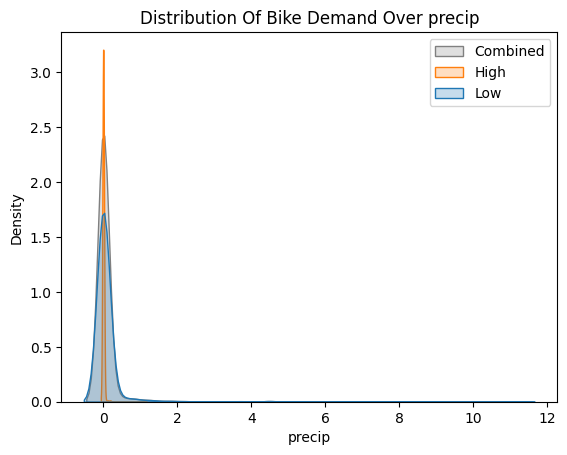

C:\Users\sigge\AppData\Local\Temp\ipykernel_4908\1712264195.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feat, fill=True, common_norm=True, color='grey')
C:\Users\sigge\AppData\Local\Temp\ipykernel_4908\1712264195.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feat, hue="increase_stock", fill=True, common_norm=True)


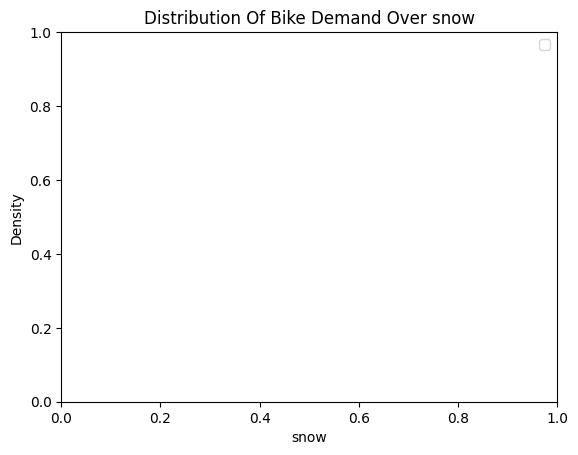

C:\Users\sigge\AppData\Local\Temp\ipykernel_4908\1712264195.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feat, hue="increase_stock", fill=True, common_norm=True)


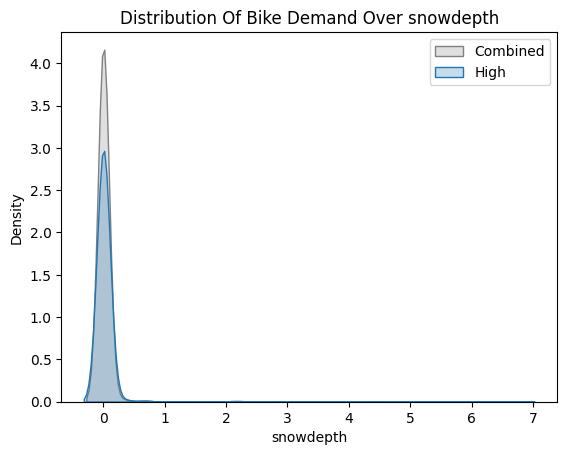

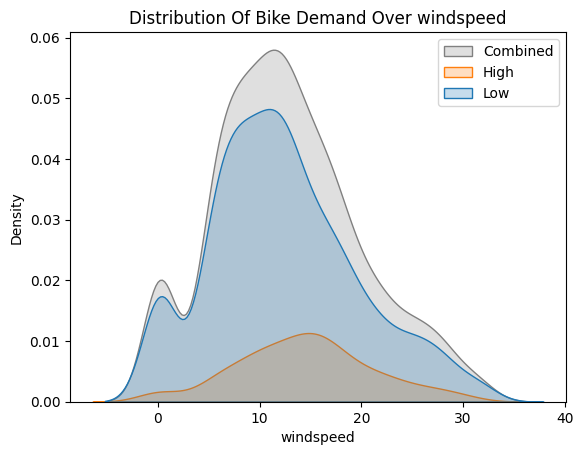

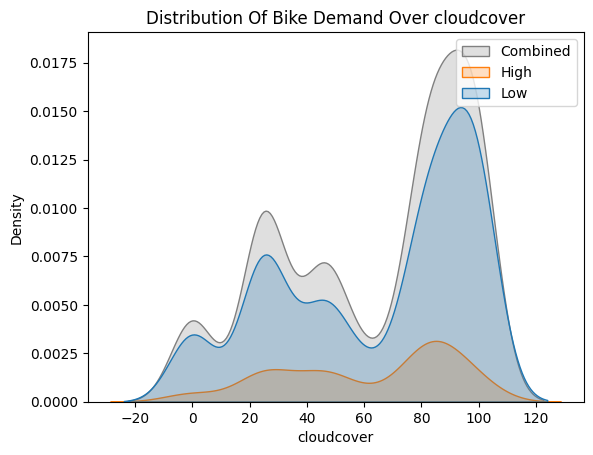

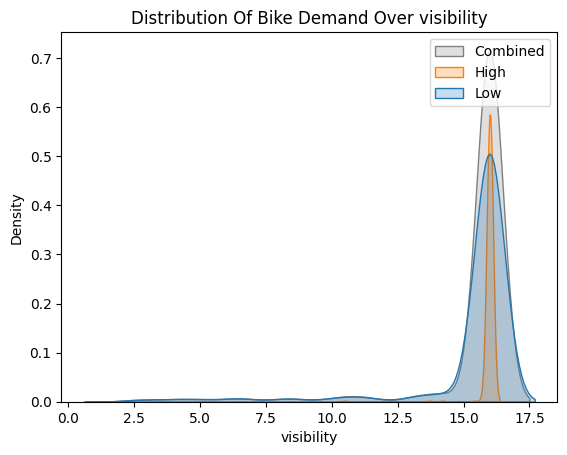

C:\Users\sigge\AppData\Local\Temp\ipykernel_4908\1712264195.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feat, hue="increase_stock", fill=True, common_norm=True)


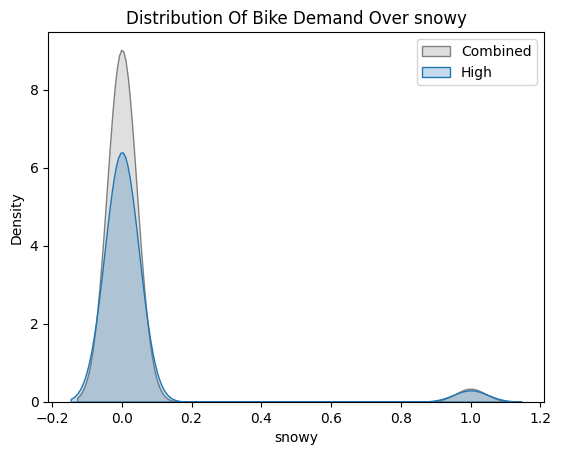

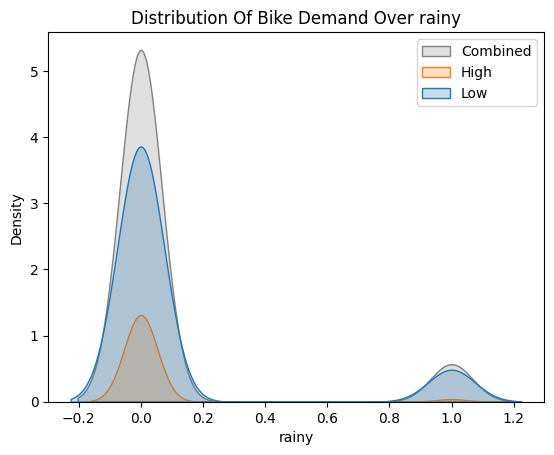

C:\Users\sigge\AppData\Local\Temp\ipykernel_4908\1712264195.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feat, hue="increase_stock", fill=True, common_norm=True)


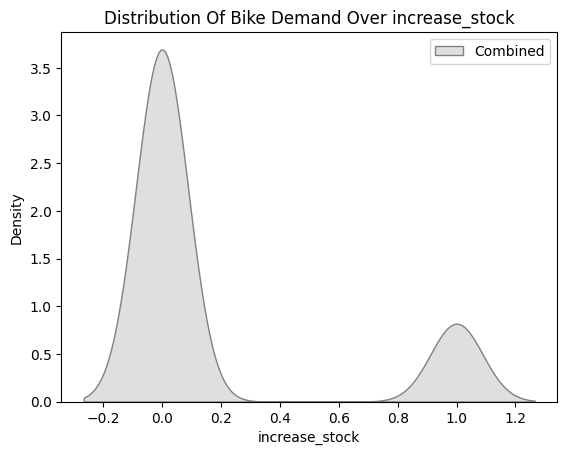

In [26]:
for feat in dataSet:
    data = {
        feat: dataSet[feat],
        'increase_stock': dataSet['increase_stock']
    }
    df = pd.DataFrame(data)

    sns.kdeplot(data=df, x=feat, fill=True, common_norm=True, color='grey')
    sns.kdeplot(data=df, x=feat, hue="increase_stock", fill=True, common_norm=True)
    plt.title(f'Distribution Of Bike Demand Over {feat}')
    plt.legend(['Combined', 'High', 'Low'])
    plt.show()

#### Outliers

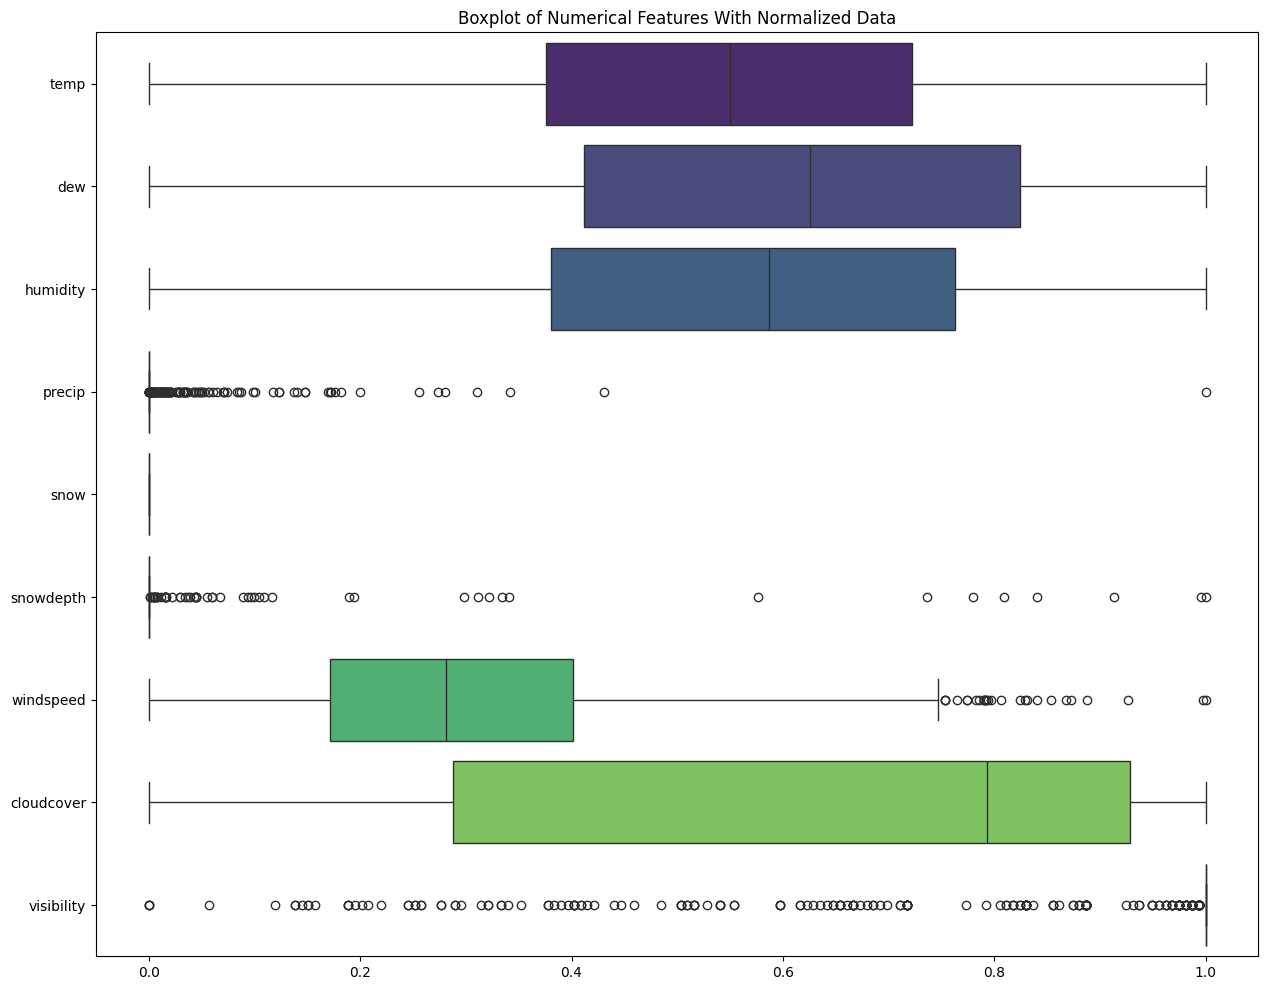

In [171]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Import training data
dataSet = pd.read_csv('training_data.csv')

# Mapping Increase_Stock to have binary values
dataSet['increase_stock'] = dataSet['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})

# Adding new features
night = []
for i in dataSet['hour_of_day']:
    if i >= 18 or i < 6:
        night.append(1)
    else:
        night.append(0)
dataSet["night"] = night

rainy = []
for i in dataSet['precip']:
    if i > 0:
        rainy.append(1)
    else:
        rainy.append(0)
dataSet["rainy"] = rainy

snowy = []
for i in dataSet['snowdepth']:
    if i > 0:
        snowy.append(1)
    else:
        snowy.append(0)
dataSet["snowy"] = snowy

# Separate the target variable
column_to_move = dataSet.pop('increase_stock')
dataSet['increase_stock'] = column_to_move

dataSet = dataSet.drop(columns=['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'night', 'snowy', 'rainy', 'increase_stock'])

# Normalize features
scaler = MinMaxScaler()
dataSet_normalized = pd.DataFrame(scaler.fit_transform(dataSet), columns=dataSet.columns)

# Display boxplot of normalized data
plt.figure(figsize=(15, 12))
sns.boxplot(data=dataSet_normalized, orient='h', palette='viridis')
plt.title('Boxplot of Numerical Features With Normalized Data')
plt.show()
